# Feature Importance using Light-BGM model

by GONG ZERUI 2022/04/18

Note:
The reason I used LBGM model instead of XGBoost model is because our dataset is relatively large and LBGM is more process-friendly.

### 1. Load Libraries


In [33]:
# import libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

### 2. Load data


In [21]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")

# combine both dataframes
df_train['Data'] = 'Train'
df_test['Data'] = 'Test'
df_total = pd.concat([df_train,df_test], axis = 0).reset_index(drop = True)
df_total['subject'] = '#' + df_total['subject'].astype(str)

# create label
label = df_total.pop('Activity')

print('Shape Train:\t{}'.format(df_train.shape))
print('Shape Test:\t{}\n'.format(df_test.shape))



Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



### 3. What data is more important for classifying Participants?

In [50]:
def featureImportanceExplore(activityLabel):
    # create dataset
    tsne_data = df_total[label == activityLabel].copy()
    data_data = tsne_data.pop('Data')
    subject_data = tsne_data.pop('subject')

    # Scale data
    scl = StandardScaler()
    tsne_data = scl.fit_transform(tsne_data)

    # split train-test
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(subject_data)
    X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)

    # Create model
    lgbm = LGBMClassifier(n_estimators=200, random_state=3)
    lgbm = lgbm.fit(X_train, y_train)
    
    # Get importances
    features = df_total.drop(['Data', 'subject'], axis=1).columns
    importances = lgbm.feature_importances_

    print(features)
    # Sum importances
    data = {'tBodyAcc':0, 'tGravityAcc':0, 'tBodyGyro':0, 'fBodyAcc':0, 'fBodyGyro':0, 'angle': 0}
    for importance, feature in zip(importances, features):
        if 'tBodyAcc' in feature:
            data['tBodyAcc'] += importance
        if 'tGravityAcc' in feature:
            data['tGravityAcc'] += importance
        if 'tBodyGyro' in feature:
            data['tBodyGyro'] += importance
        if 'fBodyAcc' in feature:
            data['fBodyAcc'] += importance
        if 'fBodyGyro' in feature:
            data['fBodyGyro'] += importance
        if 'angle' in feature:
            data['angle'] += importance
        
            
    # Create dataframe and plot
    sensor_df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'Importance'})
    sensor_df.plot(kind='barh', figsize=(14,4), title='Sensor Importance For Classifing Participants By '+str(activityLabel)+ ' Style (Feature Importance Sum)')
    plt.show()


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


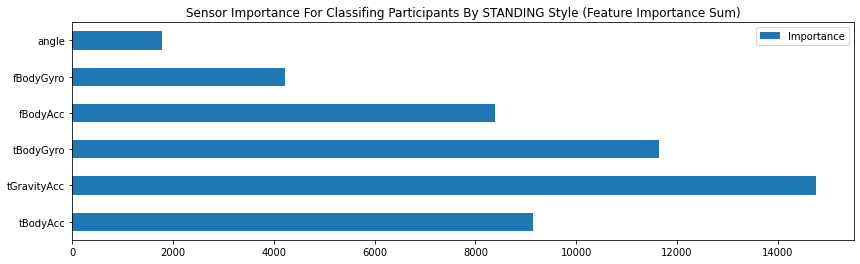

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


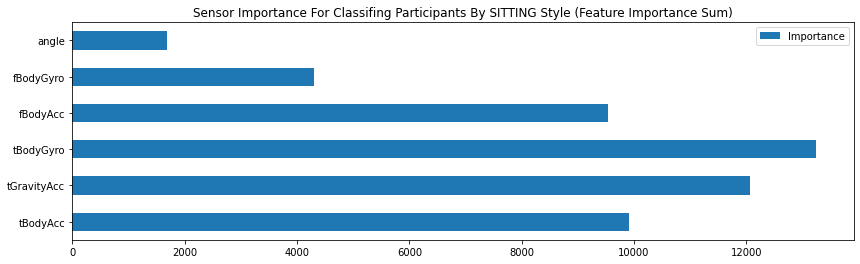

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


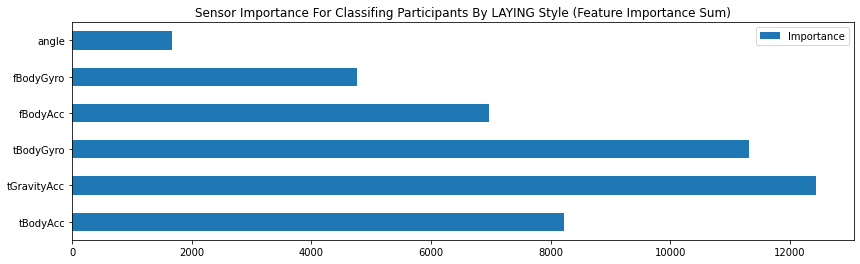

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


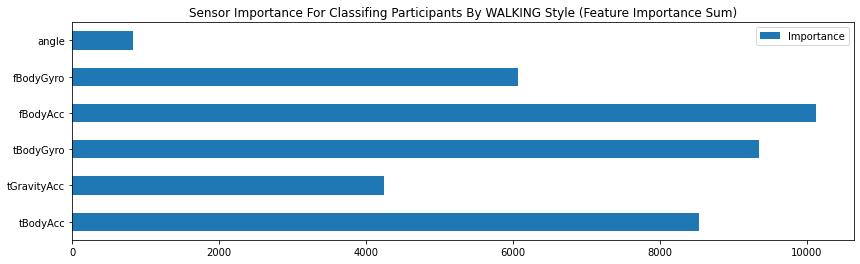

In [51]:
featureImportanceExplore('STANDING')
featureImportanceExplore('SITTING')
featureImportanceExplore('LAYING')
featureImportanceExplore('WALKING')